Importing Libraries

In [1]:
#Required Modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import io
import seaborn as sns
from scipy.stats import skew

In [2]:
#Reading Raw Data
df = pd.read_csv('/content/dataset.csv',index_col=[0])
df.head()

,open,high,low,close,volume,marketCap,timestamp,crypto_name,date
0,112.900002,118.800003,107.142998,115.910004,0.0,1.288693e+09,2013-05-05T23:59:59.999Z,Bitcoin,2013-05-05
1,3.493130,3.692460,3.346060,3.590890,0.0,6.229819e+07,2013-05-05T23:59:59.999Z,Litecoin,2013-05-05
2,115.980003,124.663002,106.639999,112.300003,0.0,1.249023e+09,2013-05-06T23:59:59.999Z,Bitcoin,2013-05-06
3,3.594220,3.781020,3.116020,3.371250,0.0,5.859436e+07,2013-05-06T23:59:59.999Z,Litecoin,2013-05-06
4,112.250000,113.444000,97.699997,111.500000,0.0,1.240594e+09,2013-05-07T23:59:59.999Z,Bitcoin,2013-05-07


In [3]:
#Dropping columns that are not useful for analysis
df = df.drop(df.columns[[6]], axis = 1)
df.head()

,open,high,low,close,volume,marketCap,crypto_name,date
0,112.900002,118.800003,107.142998,115.910004,0.0,1.288693e+09,Bitcoin,2013-05-05
1,3.493130,3.692460,3.346060,3.590890,0.0,6.229819e+07,Litecoin,2013-05-05
2,115.980003,124.663002,106.639999,112.300003,0.0,1.249023e+09,Bitcoin,2013-05-06
3,3.594220,3.781020,3.116020,3.371250,0.0,5.859436e+07,Litecoin,2013-05-06
4,112.250000,113.444000,97.699997,111.500000,0.0,1.240594e+09,Bitcoin,2013-05-07


In [4]:
column_headers = list(df.columns)
print(column_headers)

['open', 'high', 'low', 'close', 'volume', 'marketCap', 'crypto_name', 'date']


In [5]:
#Checking for Missing Values
df.isnull().sum()

open           0
high           0
low            0
close          0
volume         0
marketCap      0
crypto_name    0
date           0
dtype: int64

In [6]:
#Removing Exponential Components
pd.options.display.float_format = '{:,.4f}'.format
df.head()

,open,high,low,close,volume,marketCap,crypto_name,date
0,112.9000,118.8000,107.1430,115.9100,0.0000,"1,288,693,175.5000",Bitcoin,2013-05-05
1,3.4931,3.6925,3.3461,3.5909,0.0000,"62,298,185.4291",Litecoin,2013-05-05
2,115.9800,124.6630,106.6400,112.3000,0.0000,"1,249,023,060.0000",Bitcoin,2013-05-06
3,3.5942,3.7810,3.1160,3.3712,0.0000,"58,594,361.2350",Litecoin,2013-05-06
4,112.2500,113.4440,97.7000,111.5000,0.0000,"1,240,593,600.0000",Bitcoin,2013-05-07


In [7]:
df.dtypes

open           float64
high           float64
low            float64
close          float64
volume         float64
marketCap      float64
crypto_name     object
date            object
dtype: object

In [8]:
#Fixing Data Type for date column
df["new_date"] = pd.to_datetime(df["date"], format='%Y-%m-%d')
df['year'] = df['new_date'].dt.year
df['month'] = df['new_date'].dt.month

In [9]:
df = df.drop(df.columns[[7]], axis = 1)
df.dtypes

open                  float64
high                  float64
low                   float64
close                 float64
volume                float64
marketCap             float64
crypto_name            object
new_date       datetime64[ns]
year                    int64
month                   int64
dtype: object

In [10]:
#fixing data type for crypto_name column
df["crypto_name"] = df["crypto_name"].astype("category")
df.dtypes

open                  float64
high                  float64
low                   float64
close                 float64
volume                float64
marketCap             float64
crypto_name          category
new_date       datetime64[ns]
year                    int64
month                   int64
dtype: object

In [11]:
#Cleansed Data
df.head(10)

,open,high,low,close,volume,marketCap,crypto_name,new_date,year,month
0,112.9000,118.8000,107.1430,115.9100,0.0000,"1,288,693,175.5000",Bitcoin,2013-05-05,2013,5
1,3.4931,3.6925,3.3461,3.5909,0.0000,"62,298,185.4291",Litecoin,2013-05-05,2013,5
2,115.9800,124.6630,106.6400,112.3000,0.0000,"1,249,023,060.0000",Bitcoin,2013-05-06,2013,5
3,3.5942,3.7810,3.1160,3.3712,0.0000,"58,594,361.2350",Litecoin,2013-05-06,2013,5
4,112.2500,113.4440,97.7000,111.5000,0.0000,"1,240,593,600.0000",Bitcoin,2013-05-07,2013,5
5,3.3709,3.4067,2.9398,3.3327,0.0000,"58,051,265.0352",Litecoin,2013-05-07,2013,5
6,3.2836,3.4911,3.2836,3.4092,0.0000,"59,508,216.0152",Litecoin,2013-05-08,2013,5
7,109.6000,115.7800,109.6000,113.5660,0.0000,"1,264,049,202.1500",Bitcoin,2013-05-08,2013,5
8,3.3994,3.4417,3.2949,3.4162,0.0000,"59,755,569.0920",Litecoin,2013-05-09,2013,5
9,113.2000,113.4600,109.2600,112.6700,0.0000,"1,254,535,382.0000",Bitcoin,2013-05-09,2013,5


In [12]:
df.tail(10)

,open,high,low,close,volume,marketCap,crypto_name,new_date,year,month
72936,4.9056,5.0298,4.8136,5.0219,"27,845,089.0700","1,350,318,838.1100",Internet Computer,2022-10-23,2022,10
72937,8.8481,9.1213,8.3245,8.7269,"50,186,982.8800","1,338,344,167.4800",Huobi Token,2022-10-23,2022,10
72938,0.0597,0.0608,0.0586,0.0606,"21,723,721.8100","1,391,261,076.0000",Hedera,2022-10-23,2022,10
72939,22.5802,23.1849,22.4218,23.1476,"34,691,702.7400","3,084,675,569.4900",FTX Token,2022-10-23,2022,10
72940,1.3840,1.4060,1.3543,1.4045,"4,750,240.3800","1,715,465,953.7600",Toncoin,2022-10-23,2022,10
72941,0.0226,0.0230,0.0222,0.0228,"40,401,338.0800","1,652,957,186.6300",VeChain,2022-10-23,2022,10
72942,1.4682,1.5305,1.4354,1.5179,"28,443,510.4300","1,572,824,923.0800",Flow,2022-10-23,2022,10
72943,4.9504,5.1486,4.9453,5.1172,"106,949,683.6200","1,559,551,358.4900",Filecoin,2022-10-23,2022,10
72944,0.0002,0.0002,0.0002,0.0002,"214,326,817.6300","1,576,291,167.4500",Terra Classic,2022-10-23,2022,10
72945,0.4655,0.4710,0.4534,0.4690,"950,974,304.9800","23,398,675,901.6100",XRP,2022-10-23,2022,10


# Pre-processing


# Outlier Analysis
# 1. Box Plot

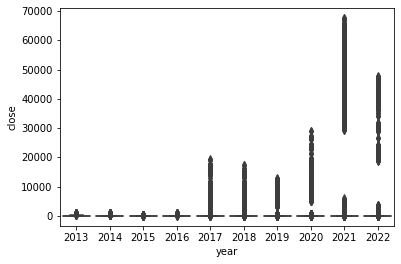

In [13]:
ax = sns.boxplot(x="year", y="close", data=df)

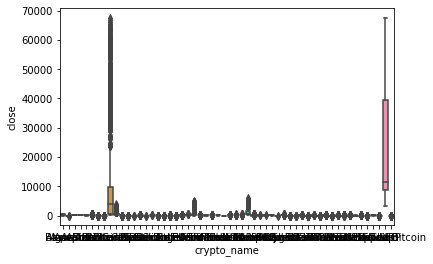

In [14]:
ax = sns.boxplot(x="crypto_name", y="close", data=df)


# 2. IQR

In [15]:
def outlier_treatment(datacolumn):
  sorted(datacolumn)
  Q1,Q3 = np.percentile(datacolumn,[40,60])
  IQR=Q3-Q1
  print("IQR:  ",IQR)
  lower_range=Q1-(1.5*IQR)
  upper_range=Q3+(1.5*IQR)
  return lower_range,upper_range

In [16]:
lowerbound,upperbound = outlier_treatment(df['close'])

IQR:   3.2101698472999995


In [17]:
#filtering dataset according to IQR
filtered_data = df[(df.close < lowerbound) | (df.close > upperbound)]
#Although dataframe has huge number of outliers, not all of them can be removed.
#This is because the outliers may have been caused due to actual events.
#We also need to consider the fact that the cryptocurrency market is very volatile and has huge variations.

In [18]:
#Taking Mean of the variables
df[['open', 'high', 'low', 'close', 'volume', 'marketCap']].mean()

open                   870.1945
high                   896.4124
low                    844.0606
close                  871.2949
volume       2,207,607,310.5056
marketCap   14,749,221,288.6943
dtype: float64

In [19]:
#Taking Median of the variables
df[['open', 'high', 'low', 'close', 'volume', 'marketCap']].median()

open                    1.6307
high                    1.7175
low                     1.5415
close                   1.6402
volume        109,875,645.9553
marketCap   1,268,539,252.5723
dtype: float64

In [20]:
#Taking Mode of the variables
df[['open', 'high', 'low', 'close', 'volume', 'marketCap']].mode()

,open,high,low,close,volume,marketCap
0,1.0000,1.0000,1.0000,1.0000,0.0000,0.0000


In [21]:
#Standard Deviation
np.std(df[['open', 'high', 'low', 'close', 'volume', 'marketCap']], axis = 0)

open                 5,231.6186
high                 5,398.5756
low                  5,079.3546
close                5,235.4723
volume       9,617,818,979.5179
marketCap   75,011,077,205.6859
dtype: float64

In [22]:
#Variance
np.var(df[['open', 'high', 'low', 'close', 'volume', 'marketCap']], axis = 0)

open                           27,369,833.2832
high                           29,144,618.8045
low                            25,799,842.8588
close                          27,410,169.6986
volume         92,502,441,922,775,285,760.0000
marketCap   5,626,661,703,557,363,793,920.0000
dtype: float64

In [23]:
#Kurtosis
from scipy.stats import kurtosis

print("Pearson Kurtosis: ", kurtosis(df[['open', 'high', 'low', 'close', 'volume', 'marketCap']], fisher=False))
print("Fisher Kurtosis: ", kurtosis(df[['open', 'high', 'low', 'close', 'volume', 'marketCap']], fisher=True))

Pearson Kurtosis:  [ 80.14357608  88.72655568  80.44716118  79.99870494 139.18110365
 122.47722167]
Fisher Kurtosis:  [ 77.14357608  85.72655568  77.44716118  76.99870494 136.18110365
 119.47722167]


In [24]:
#Checking skewness of the data
skew(df[['open', 'high', 'low', 'close', 'volume', 'marketCap']], axis = 0)

#When the skew value is greater than 0 means that the data is left skewed 

array([ 8.45653529,  8.64823371,  8.46800148,  8.44885284,  9.49944543,
       10.18308072])

In [25]:
#Log transformation
#log(x+1) used here to handle skewness.
df['log_open'] = np.log10(df['open']+1)
df['log_high'] = np.log10(df['high']+1)
df['log_low'] = np.log10(df['low']+1)
df['log_close'] = np.log10(df['close']+1)
df['log_volume'] = np.log10(df['volume']+1)
df['log_marketCap'] = np.log10(df['marketCap']+1)

In [26]:
skew(df[['log_open', 'log_high', 'log_low', 'log_close', 'log_volume', 'log_marketCap']], axis = 0)
#Now the data seems to be nornmally distributed.

array([ 1.43100849,  1.4160231 ,  1.44660305,  1.43035073, -1.38125942,
       -3.03989126])

In [27]:
df.head()

,open,high,low,close,volume,marketCap,crypto_name,new_date,year,month,log_open,log_high,log_low,log_close,log_volume,log_marketCap
0,112.9000,118.8000,107.1430,115.9100,0.0000,"1,288,693,175.5000",Bitcoin,2013-05-05,2013,5,2.0565,2.0785,2.0340,2.0679,0.0000,9.1101
1,3.4931,3.6925,3.3461,3.5909,0.0000,"62,298,185.4291",Litecoin,2013-05-05,2013,5,0.6525,0.6714,0.6381,0.6619,0.0000,7.7945
2,115.9800,124.6630,106.6400,112.3000,0.0000,"1,249,023,060.0000",Bitcoin,2013-05-06,2013,5,2.0681,2.0992,2.0320,2.0542,0.0000,9.0966
3,3.5942,3.7810,3.1160,3.3712,0.0000,"58,594,361.2350",Litecoin,2013-05-06,2013,5,0.6622,0.6795,0.6145,0.6406,0.0000,7.7679
4,112.2500,113.4440,97.7000,111.5000,0.0000,"1,240,593,600.0000",Bitcoin,2013-05-07,2013,5,2.0540,2.0586,1.9943,2.0512,0.0000,9.0936


In [28]:
df.tail()

,open,high,low,close,volume,marketCap,crypto_name,new_date,year,month,log_open,log_high,log_low,log_close,log_volume,log_marketCap
72941,0.0226,0.0230,0.0222,0.0228,"40,401,338.0800","1,652,957,186.6300",VeChain,2022-10-23,2022,10,0.0097,0.0099,0.0095,0.0098,7.6064,9.2183
72942,1.4682,1.5305,1.4354,1.5179,"28,443,510.4300","1,572,824,923.0800",Flow,2022-10-23,2022,10,0.3924,0.4032,0.3866,0.4010,7.4540,9.1967
72943,4.9504,5.1486,4.9453,5.1172,"106,949,683.6200","1,559,551,358.4900",Filecoin,2022-10-23,2022,10,0.7745,0.7888,0.7742,0.7866,8.0292,9.1930
72944,0.0002,0.0002,0.0002,0.0002,"214,326,817.6300","1,576,291,167.4500",Terra Classic,2022-10-23,2022,10,0.0001,0.0001,0.0001,0.0001,8.3311,9.1976
72945,0.4655,0.4710,0.4534,0.4690,"950,974,304.9800","23,398,675,901.6100",XRP,2022-10-23,2022,10,0.1660,0.1676,0.1624,0.1670,8.9782,10.3692


In [29]:
new_df = df.loc[df['crypto_name'] == 'Bitcoin']
new_df.head()

,open,high,low,close,volume,marketCap,crypto_name,new_date,year,month,log_open,log_high,log_low,log_close,log_volume,log_marketCap
0,112.9000,118.8000,107.1430,115.9100,0.0000,"1,288,693,175.5000",Bitcoin,2013-05-05,2013,5,2.0565,2.0785,2.0340,2.0679,0.0000,9.1101
2,115.9800,124.6630,106.6400,112.3000,0.0000,"1,249,023,060.0000",Bitcoin,2013-05-06,2013,5,2.0681,2.0992,2.0320,2.0542,0.0000,9.0966
4,112.2500,113.4440,97.7000,111.5000,0.0000,"1,240,593,600.0000",Bitcoin,2013-05-07,2013,5,2.0540,2.0586,1.9943,2.0512,0.0000,9.0936
7,109.6000,115.7800,109.6000,113.5660,0.0000,"1,264,049,202.1500",Bitcoin,2013-05-08,2013,5,2.0438,2.0674,2.0438,2.0591,0.0000,9.1018
9,113.2000,113.4600,109.2600,112.6700,0.0000,"1,254,535,382.0000",Bitcoin,2013-05-09,2013,5,2.0577,2.0587,2.0424,2.0556,0.0000,9.0985


In [ ]:
new_df.head(20)

In [31]:
new_df = new_df.reset_index(drop=True)
new_df.head()

,open,high,low,close,volume,marketCap,crypto_name,new_date,year,month,log_open,log_high,log_low,log_close,log_volume,log_marketCap
0,112.9000,118.8000,107.1430,115.9100,0.0000,"1,288,693,175.5000",Bitcoin,2013-05-05,2013,5,2.0565,2.0785,2.0340,2.0679,0.0000,9.1101
1,115.9800,124.6630,106.6400,112.3000,0.0000,"1,249,023,060.0000",Bitcoin,2013-05-06,2013,5,2.0681,2.0992,2.0320,2.0542,0.0000,9.0966
2,112.2500,113.4440,97.7000,111.5000,0.0000,"1,240,593,600.0000",Bitcoin,2013-05-07,2013,5,2.0540,2.0586,1.9943,2.0512,0.0000,9.0936
3,109.6000,115.7800,109.6000,113.5660,0.0000,"1,264,049,202.1500",Bitcoin,2013-05-08,2013,5,2.0438,2.0674,2.0438,2.0591,0.0000,9.1018
4,113.2000,113.4600,109.2600,112.6700,0.0000,"1,254,535,382.0000",Bitcoin,2013-05-09,2013,5,2.0577,2.0587,2.0424,2.0556,0.0000,9.0985


In [32]:
new_df = new_df.drop(['month','year','log_open','log_high','log_low','log_close','log_volume','log_marketCap'], axis = 1)
new_df

,open,high,low,close,volume,marketCap,crypto_name,new_date
0,112.9000,118.8000,107.1430,115.9100,0.0000,"1,288,693,175.5000",Bitcoin,2013-05-05
1,115.9800,124.6630,106.6400,112.3000,0.0000,"1,249,023,060.0000",Bitcoin,2013-05-06
2,112.2500,113.4440,97.7000,111.5000,0.0000,"1,240,593,600.0000",Bitcoin,2013-05-07
3,109.6000,115.7800,109.6000,113.5660,0.0000,"1,264,049,202.1500",Bitcoin,2013-05-08
4,113.2000,113.4600,109.2600,112.6700,0.0000,"1,254,535,382.0000",Bitcoin,2013-05-09
...,...,...,...,...,...,...,...,...
3243,"18,936.3115","19,134.7332","18,696.4683","18,802.0980","23,359,966,112.4500","360,259,346,858.0700",Bitcoin,2022-09-25
3244,"19,311.8487","19,370.3093","18,970.6206","19,044.1073","20,765,955,327.4900","365,024,821,953.6900",Bitcoin,2022-10-02
3245,"19,417.4794","19,542.5387","19,349.2590","19,446.4262","16,837,262,532.2500","372,876,821,416.3800",Bitcoin,2022-10-09
3246,"19,068.9136","19,389.6035","19,068.9136","19,268.0928","17,988,916,650.3600","369,584,293,835.8100",Bitcoin,2022-10-16


In [33]:
from sklearn.preprocessing import MinMaxScaler

In [34]:
new_df = new_df.drop(['crypto_name'], axis = 1)

In [39]:
data_training = new_df[new_df['new_date']< '2021-04-01'].copy()
data_training

,open,high,low,close,volume,marketCap,new_date
0,112.9000,118.8000,107.1430,115.9100,0.0000,"1,288,693,175.5000",2013-05-05
1,115.9800,124.6630,106.6400,112.3000,0.0000,"1,249,023,060.0000",2013-05-06
2,112.2500,113.4440,97.7000,111.5000,0.0000,"1,240,593,600.0000",2013-05-07
3,109.6000,115.7800,109.6000,113.5660,0.0000,"1,264,049,202.1500",2013-05-08
4,113.2000,113.4600,109.2600,112.6700,0.0000,"1,254,535,382.0000",2013-05-09
...,...,...,...,...,...,...,...
2868,"55,137.5672","56,568.2160","54,242.9097","55,973.5108","47,266,542,233.3700","1,044,814,147,411.6000",2021-03-27
2869,"55,974.9412","56,610.3120","55,071.1120","55,950.7458","47,686,580,917.9900","1,044,446,559,059.0601",2021-03-28
2870,"55,947.8990","58,342.0964","55,139.3418","57,750.1999","57,625,587,027.0400","1,078,088,296,476.7100",2021-03-29
2871,"57,750.1328","59,447.2240","57,251.5506","58,917.6930","54,414,116,432.0200","1,099,939,890,804.4099",2021-03-30


In [40]:
data_test = new_df[new_df['new_date']> '2021-04-01'].copy()
data_test

,open,high,low,close,volume,marketCap,new_date
2874,"59,098.8791","60,267.1877","58,869.2800","59,384.3134","58,727,860,620.1200","1,108,813,863,082.8601",2021-04-02
2875,"59,397.4085","60,110.2685","57,603.8892","57,603.8892","59,641,344,483.6200","1,075,617,261,180.3300",2021-04-03
2876,"57,604.8386","58,913.7478","57,168.6758","58,758.5563","50,749,662,969.7000","1,097,232,660,348.1600",2021-04-04
2877,"58,760.8733","59,891.2969","57,694.8260","59,057.8790","60,706,272,114.6200","1,102,880,790,089.1799",2021-04-05
2878,"59,171.9320","59,479.5786","57,646.8089","58,192.3587","66,058,027,987.8800","1,086,769,183,294.5601",2021-04-06
...,...,...,...,...,...,...,...
3243,"18,936.3115","19,134.7332","18,696.4683","18,802.0980","23,359,966,112.4500","360,259,346,858.0700",2022-09-25
3244,"19,311.8487","19,370.3093","18,970.6206","19,044.1073","20,765,955,327.4900","365,024,821,953.6900",2022-10-02
3245,"19,417.4794","19,542.5387","19,349.2590","19,446.4262","16,837,262,532.2500","372,876,821,416.3800",2022-10-09
3246,"19,068.9136","19,389.6035","19,068.9136","19,268.0928","17,988,916,650.3600","369,584,293,835.8100",2022-10-16


In [41]:
training_data = data_training.drop(['new_date', 'marketCap'], axis = 1)
training_data.head()

,open,high,low,close,volume
0,112.9000,118.8000,107.1430,115.9100,0.0000
1,115.9800,124.6630,106.6400,112.3000,0.0000
2,112.2500,113.4440,97.7000,111.5000,0.0000
3,109.6000,115.7800,109.6000,113.5660,0.0000
4,113.2000,113.4600,109.2600,112.6700,0.0000


In [ ]:
scaler = MinMaxScaler()
training_data = scaler.fit_transform(training_data)
training_data

In [43]:
X_train = [] 
Y_train = []

In [44]:
training_data.shape[0]

2873

In [45]:
for i in range(60, training_data.shape[0]):
  X_train.append(training_data[i-60:i])
  Y_train.append(training_data[i,0])


In [46]:
X_train, Y_train = np.array(X_train), np.array(Y_train)

In [47]:
X_train.shape

(2813, 60, 5)

In [48]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [49]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (X_train.shape[1], 5)))
model.add(Dropout(0.2)) 

In [50]:

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3)) 
model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4)) 
model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5)) 
model.add(Dense(units =1))

In [52]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            11200     
                                                                 
 dropout (Dropout)           (None, 60, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 60, 60)            26640     
                                                                 
 dropout_1 (Dropout)         (None, 60, 60)            0         
                                                                 
 lstm_2 (LSTM)               (None, 60, 80)            45120     
                                                                 
 dropout_2 (Dropout)         (None, 60, 80)            0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [54]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [55]:
history= model.fit(X_train, Y_train, epochs = 20, batch_size =50, validation_split=0.1)

Epoch 1/20
51/51 [==============================] - 17s 234ms/step - loss: 0.0013 - val_loss: 0.0217
Epoch 2/20
51/51 [==============================] - 11s 221ms/step - loss: 4.6570e-04 - val_loss: 0.0287
Epoch 3/20
51/51 [==============================] - 11s 216ms/step - loss: 3.9556e-04 - val_loss: 0.0201
Epoch 4/20
51/51 [==============================] - 11s 220ms/step - loss: 3.8264e-04 - val_loss: 0.0243
Epoch 5/20
51/51 [==============================] - 13s 252ms/step - loss: 4.1998e-04 - val_loss: 0.0281
Epoch 6/20
51/51 [==============================] - 11s 219ms/step - loss: 3.4565e-04 - val_loss: 0.0162
Epoch 7/20
51/51 [==============================] - 11s 221ms/step - loss: 3.1342e-04 - val_loss: 0.0259
Epoch 8/20
51/51 [==============================] - 11s 218ms/step - loss: 3.2219e-04 - val_loss: 0.0214
Epoch 9/20
51/51 [==============================] - 11s 221ms/step - loss: 2.9951e-04 - val_loss: 0.0179
Epoch 10/20
51/51 [==============================] - 11s 21

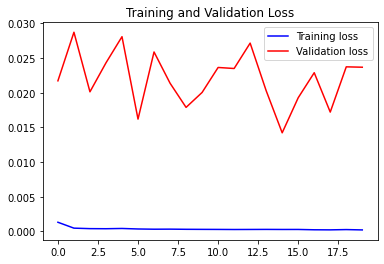

In [56]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
plt.figure()
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

In [57]:
part_60_days = data_training.tail(60)
data_df= part_60_days.append(data_test, ignore_index = True)
data_df = data_df.drop(['new_date', 'marketCap'], axis = 1)
data_df.head()

,open,high,low,close,volume
0,"32,564.0302","32,564.0302","29,367.1392","30,432.5471","62,576,762,015.4660"
1,"30,441.0418","33,858.3110","30,023.2068","33,466.0964","76,517,157,706.3200"
2,"34,318.6717","38,406.2610","32,064.8142","34,316.3877","117,894,572,510.6800"
3,"34,270.8776","34,288.3315","32,270.1760","33,114.3577","52,754,542,671.3800"
4,"33,114.5772","34,638.2135","32,384.2281","33,537.1768","61,400,400,660.2700"


In [58]:
inputs = scaler.transform(data_df)
inputs

array([[0.53138394, 0.52734681, 0.49465227, 0.49635125, 0.17829766],
       [0.49666772, 0.54835469, 0.50572761, 0.54593959, 0.21801751],
       [0.56007676, 0.62217389, 0.5401928 , 0.55983899, 0.33591265],
       ...,
       [0.31640462, 0.31599088, 0.32553642, 0.3167651 , 0.04797379],
       [0.31070469, 0.31350854, 0.3208038 , 0.31384995, 0.05125516],
       [0.31297476, 0.31768076, 0.32173706, 0.3187362 , 0.06305076]])

In [59]:
X_test = []
Y_test = []
for i in range (60, inputs.shape[0]):
    X_test.append(inputs[i-60:i])
    Y_test.append(inputs[i, 0])

In [60]:
X_test, Y_test = np.array(X_test), np.array(Y_test)
X_test.shape, Y_test.shape

((374, 60, 5), (374,))

In [ ]:
Y_pred = model.predict(X_test)
Y_pred, Y_test

In [67]:
scaler.scale_

array([1.63525266e-05, 1.62313150e-05, 1.68814006e-05, 1.63466393e-05,
       2.84926309e-12])

In [ ]:
scale = 1/1.63466393e-05
Y_test = Y_test*scale 
Y_pred = Y_pred*scale
Y_pred,Y_test

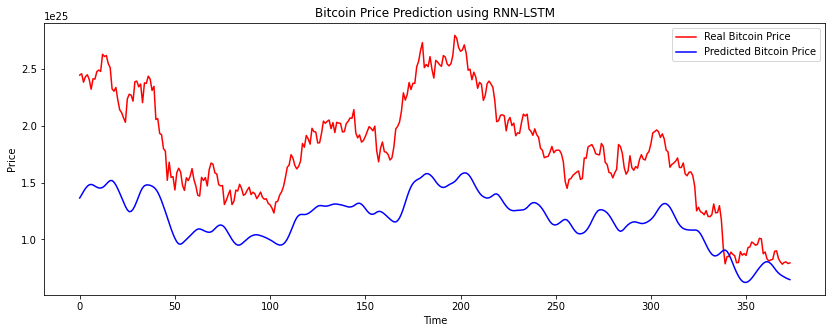

In [76]:
plt.figure(figsize=(14,5))
plt.plot(Y_test, color = 'red', label = 'Real Bitcoin Price')
plt.plot(Y_pred, color = 'blue', label = 'Predicted Bitcoin Price')
plt.title('Bitcoin Price Prediction using RNN-LSTM')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()